Timestamp $\Delta t = 1500 M$, this notebook runs from 0 to 1500M <br>
Do the var(Te) [two versions: 1) calculated from error propagation and 2) directly calculated] VS theta ([0, pi]) plots at different radius (i.e. different index slices of that (288, 128, 128) array). Say, radius r=2, then choose the slice varTe[2, 0, :] (following ($r, \phi, \theta$)) so that you got a 1D var(Te) at radius r=2 along theta

In [1]:
import warnings

from matplotlib import pyplot as plt
import numpy as np

import pyharm
from pyharm.plots import plot_dumps as pplt

import h5py

In [2]:
# some constants
cl = 29979245800.0 # speed of light in cgs
mp = 1.67262171e-24
kb = 1.3806505e-16
mu = 1.

check file radius range

In [3]:
i0 = 5010 # initial  frame
i1 = 5311 # 1 + last frame
fmt = 'torus.out0.{:05d}.h5'

def fname(i, src): # closure on `src` and `fmt`
    return (src+fmt).format(i)

In [4]:
src_ma_5M = '/xdisk/chanc/proj/eht/GRMHD_dt5M/Ma+0.94_w5/'
src_sa_5M = '/xdisk/chanc/proj/eht/GRMHD_dt5M/Sa+0.94_w5/'

src_ma_500M = '/xdisk/chanc/proj/eht/GRMHD_dt500M/Ma+0.94_w5/'
src_sa_500M = '/xdisk/chanc/proj/eht/GRMHD_dt500M/Sa+0.94_w5/'

In [5]:
# ma_ files
with h5py.File(fname(i0, src_ma_5M), 'r') as file:
    header1 = 'header/r_in'
    dataset1 = file[header1]
    print(f"Dataset associated with {header1}:")
    print(dataset1[()])
    
    header2 = 'header/r_out'
    dataset2 = file[header2]
    print(f"Dataset associated with {header2}:")
    print(dataset2[()])
    
    header3 = 'header/r_eh'
    dataset3 = file[header3]
    print(f"Dataset associated with {header3}:")
    print(dataset3[()])
    
    header4 = 'header/coordinates'
    dataset4 = file[header4]
    print(f"Dataset associated with {header4}:")
    print(dataset4[()])

Dataset associated with header/r_in:
1.1852307523849355
Dataset associated with header/r_out:
1000
Dataset associated with header/r_eh:
1.3479852726768764
Dataset associated with header/coordinates:
b'FMKS'


In [6]:
# sa_ files
with h5py.File(fname(i0, src_sa_5M), 'r') as file:
    header1 = 'header/r_in'
    dataset1 = file[header1]
    print(f"Dataset associated with {header1}:")
    print(dataset1[()])
    
    header2 = 'header/r_out'
    dataset2 = file[header2]
    print(f"Dataset associated with {header2}:")
    print(dataset2[()])
    
    header3 = 'header/r_eh'
    dataset3 = file[header3]
    print(f"Dataset associated with {header3}:")
    print(dataset3[()])

Dataset associated with header/r_in:
1.1852307523849355
Dataset associated with header/r_out:
1000
Dataset associated with header/r_eh:
1.3479852726768764


<h3>MAD</h3>

<h5>Rh=1</h5>

In [7]:
# the var(Te) directly calculated
varTe_file = np.load('ma_rh1_varTe.npy', allow_pickle=True)
avgTe = np.load("ma_rh1_avgTe.npy", allow_pickle=True)

In [8]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('ma_varPg.npy', allow_pickle=True)
varRHO_file = np.load('ma_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('ma_varbsq.npy', allow_pickle=True)

# averages
ma_avg_Pg = np.load('ma_avgPg.npy', allow_pickle=True)
ma_avg_RHO = np.load('ma_avgRHO.npy', allow_pickle=True)
ma_avg_bsq = np.load('ma_avgbsq.npy', allow_pickle=True)

ma_avgPgRHO = np.load('ma_avgRHOPg.npy', allow_pickle=True)
ma_avgPgbsq = np.load('ma_avgBsqPg.npy', allow_pickle=True)
ma_avgRHObsq = np.load('ma_avgBsqRHO.npy', allow_pickle=True)

In [9]:
# covariances
ma_covPgRHO = ma_avgPgRHO - ma_avg_Pg * ma_avg_RHO
ma_covPgbsq = ma_avgPgbsq - ma_avg_Pg * ma_avg_bsq
ma_covRHObsq = ma_avgRHObsq - ma_avg_RHO * ma_avg_bsq

In [10]:
# standard deviations
maPg_std = varPg_file**1/2
maRHO_std = varRHO_file**1/2
mabsq_std = varbsq_file**1/2

In [11]:
# coefficients
ma_CPg1 = np.load('ma_CPg1.npy')
ma_Crho1 = np.load('ma_Crho1.npy')
ma_Cbsq1 = np.load('ma_Cbsq1.npy')

$a = y(\gamma_{i} - 1)$ <br>
$b = z(\gamma_{e} - 1)$ <br>
$c = \frac{m_{p}(\gamma_{i} - 1)(\gamma_{e}-1)}{k_{B}(\gamma - 1)}$ <br>
$Te = \frac{m_{p}u(\gamma_{e}-1)(\gamma_{i}-1)}{k\rho (y(\gamma_{i}-1)+Rz(\gamma_{e}-1))}=c\frac{P_{g}}{\rho(a+bR)}$<br>
$C[Pg -> Te] = A = \frac{<Te>}{<Pg>}-\frac{2b<Te><Pg>(R_{h} - <R>)}{(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
$C[\rho -> Te] = B = -\frac{<Te>}{<\rho>}$ <br>
$C[B^{2} -> Te] = C = \frac{b<Te><Pg>}{2\mu_{0}(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
Recall: <br>
$cov(X, Y) = <XY> - <X><Y>$ <br>
dimensionless covariance: $\frac{cov(X, Y)}{\sigma_{X}\sigma_{Y}}$ <br>
var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq) <br>
**With dimensionless form:** <br> 
$\frac{var(Te)}{<Te>^{2}} = \frac{A^{2}}{<Te>^{2}}\frac{var(Pg)}{<Pg>^{2}} + \frac{B^{2}}{<Te>^{2}}\frac{var(\rho)}{<\rho>^{2}} + \frac{C^{2}}{<Te>^{2}}\frac{var(bsq)}{<bsq>^{2}} + 2\frac{AB}{<Te>^{2}}\frac{cov(Pg, \rho)}{std(Pg)std(\rho)} + 2\frac{AC}{<Te>^{2}}\frac{cov(Pg, bsq)}{std(Pg)std(bsq)} + 2\frac{BC}{<Te>^{2}}\frac{cov(\rho, bsq)}{std(\rho)std(bsq)}$ <br>
and now the variance terms become dimensionless, so are the coefficient terms

In [12]:
# var(Te) caculated from coefficients and variances
varPg_term = np.square(ma_CPg1)*varPg_file
varRHO_term = np.square(ma_Crho1)*varRHO_file
varbsq_term = np.square(ma_Cbsq1)*varbsq_file
cov_term1 = 2*ma_CPg1*ma_Crho1*ma_covPgRHO
cov_term2 = 2*ma_CPg1*ma_Cbsq1*ma_covPgbsq
cov_term3 = 2*ma_Crho1*ma_Cbsq1*ma_covRHObsq
varTe_coeff = varPg_term + varRHO_term + varbsq_term + cov_term1 + cov_term2 + cov_term3

'dimensionless, var(Te) caculated from coefficients and variances'
varTe_coeff = (ma_CPg1**2/avgTe**2)*(varPg_file/ma_avg_Pg**2) + (ma_Crho1**2/avgTe**2)*(varRHO_file/ma_avg_RHO**2) + \
            (ma_Cbsq1**2/avgTe**2)*(varbsq_file/ma_avg_bsq**2) + 2*(ma_CPg1*ma_Crho1/avgTe**2)*(ma_covPgRHO/(maPg_std*maRHO_std)) + \
            2*(ma_CPg1*ma_Cbsq1/avgTe**2)*(ma_covPgbsq/(maPg_std*mabsq_std)) + 2*(ma_Crho1*ma_Cbsq1/avgTe**2)*(ma_covRHObsq/(maRHO_std*mabsq_std))
varTe_file /= avgTe**2

Try: r = 2, 5, 8

In [13]:
def comparison_plot(r, varTe_exp, varTe_calc):
    # can change phi
    '''varTe_true = varTe_exp[r, 0, :]
    varTe_coeff = varTe_calc[r, 0, :]

    # x axis: theta
    theta = np.linspace(0, np.pi, 128)

    plt.plot(theta, varTe_true, label='expected (at r=%r)'%r)
    plt.plot(theta, varTe_coeff, label='calculated (at r=%r)'%r)
    plt.xlabel('theta')
    plt.ylabel('var(Te)')
    plt.legend()
    plt.title('Comparison Between Calculated and Expected var(Te)', y=1.1)
    plt.show()'''
    # logscale
    varTe_true = varTe_exp[r, 0, :]
    varTe_coeff = varTe_calc[r, 0, :]

    # x axis: theta
    theta = np.linspace(0, np.pi, 128)

    plt.plot(theta, np.log10(varTe_true), label='expected (at r=%r)'%r)
    plt.plot(theta, np.log10(varTe_coeff), label='calculated (at r=%r)'%r)
    plt.xlabel('theta')
    plt.ylabel('log(var(Te))')
    plt.ylim(22.0, 24.0)
    plt.legend()
    plt.title('Comparison Between Calculated and Expected var(Te)', y=1.1)
    plt.show()

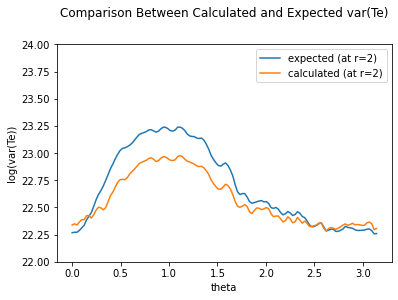

In [14]:
comparison_plot(2, varTe_file, varTe_coeff)

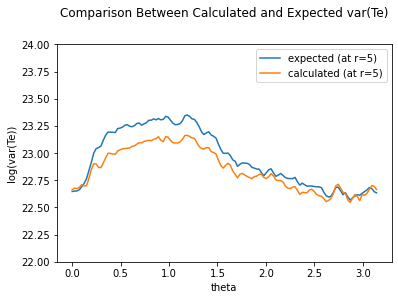

In [15]:
comparison_plot(5, varTe_file, varTe_coeff)

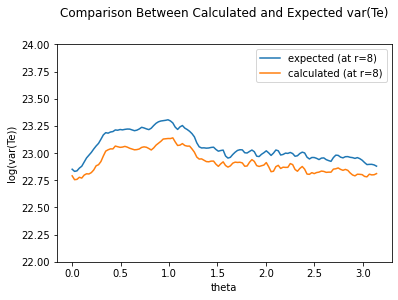

In [16]:
comparison_plot(8, varTe_file, varTe_coeff)

Try: middle and last few slices

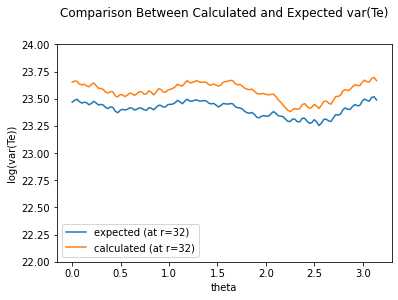

In [17]:
comparison_plot(32, varTe_file, varTe_coeff)

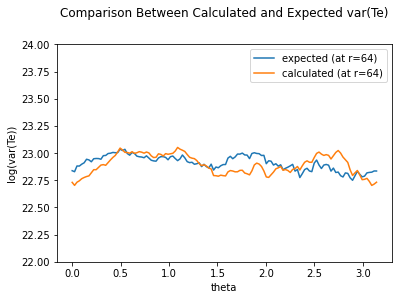

In [18]:
comparison_plot(64, varTe_file, varTe_coeff)

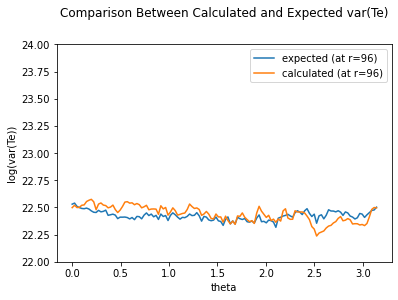

In [20]:
comparison_plot(96, varTe_file, varTe_coeff)

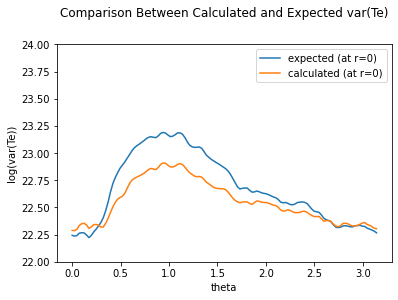

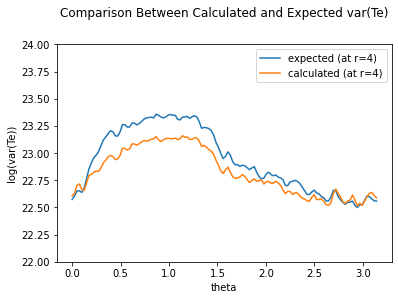

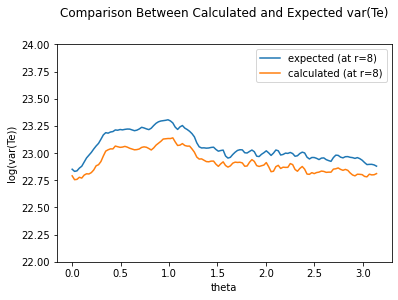

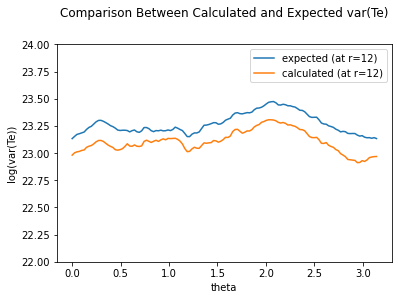

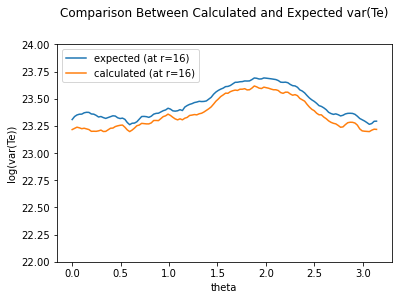

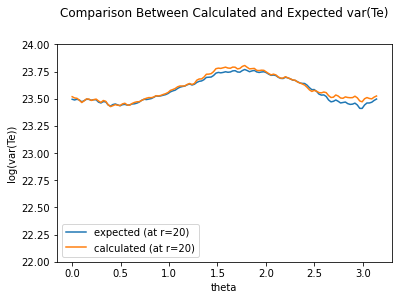

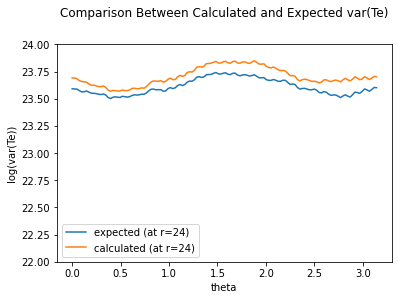

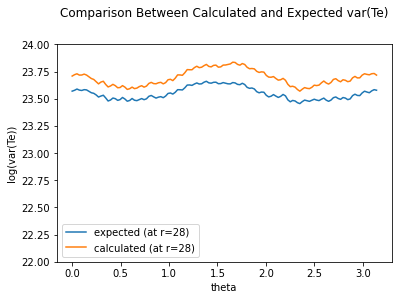

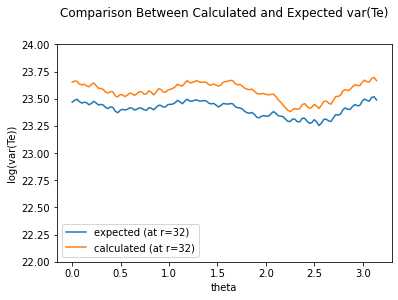

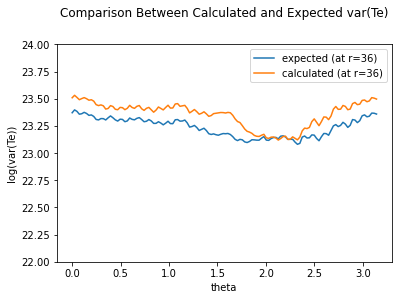

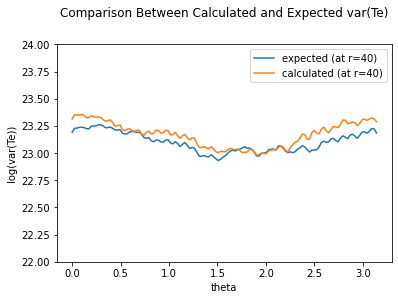

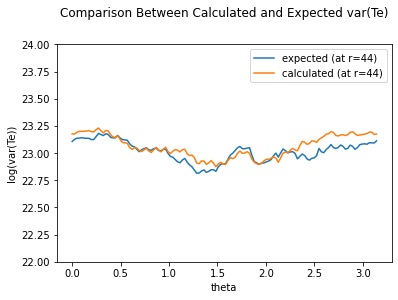

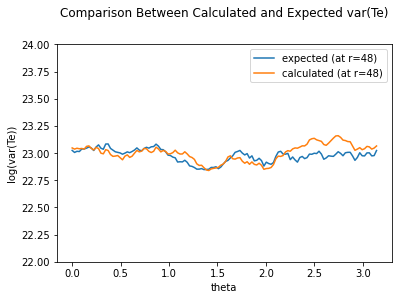

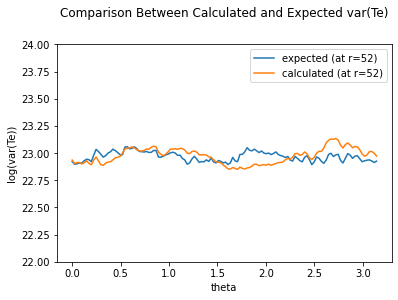

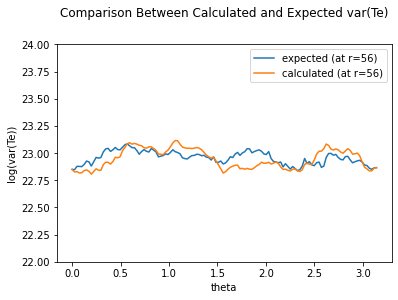

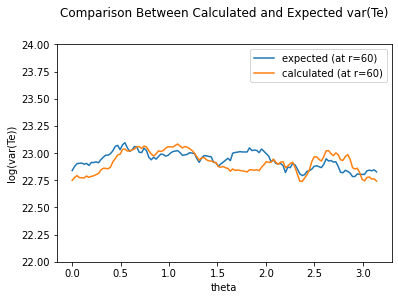

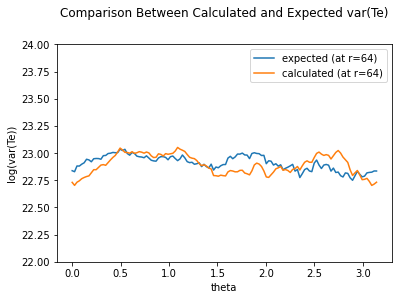

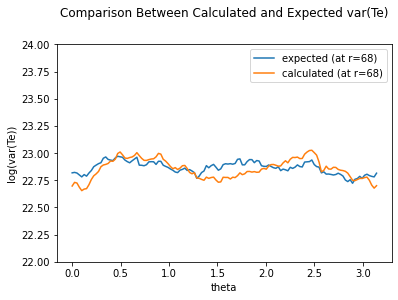

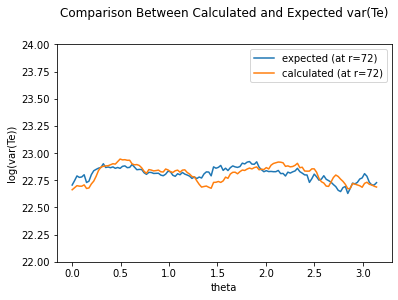

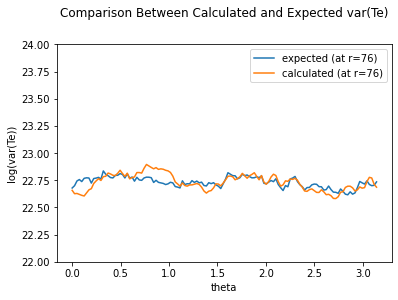

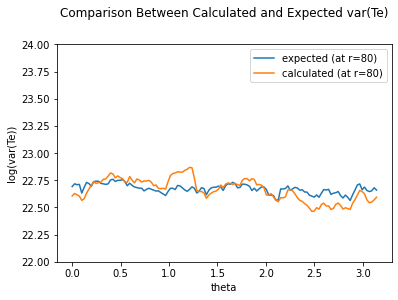

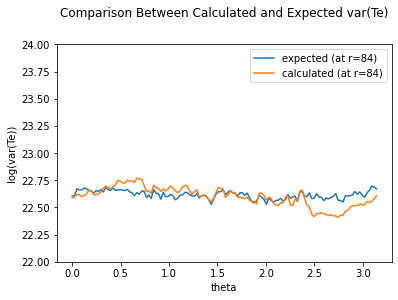

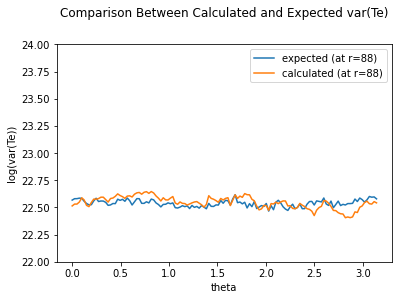

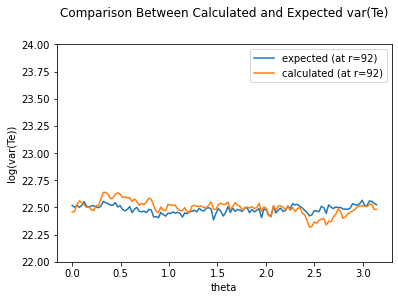

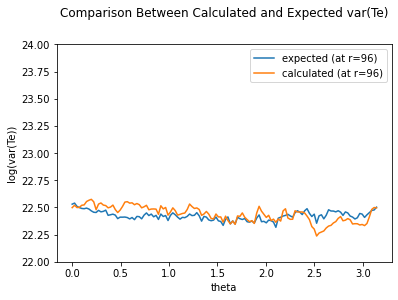

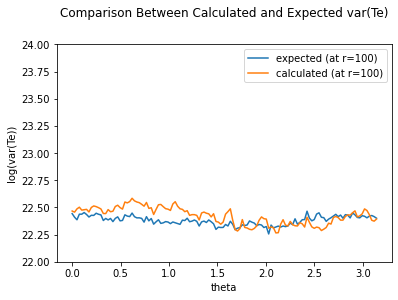

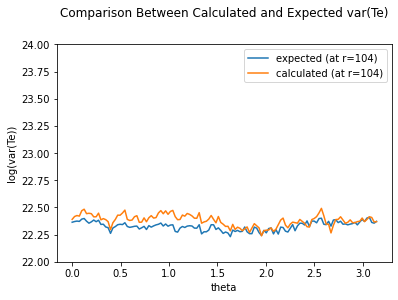

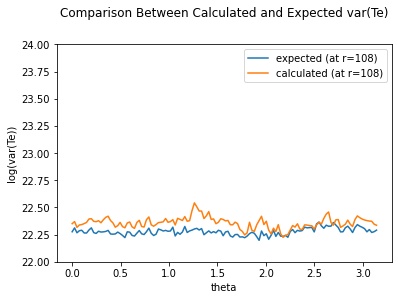

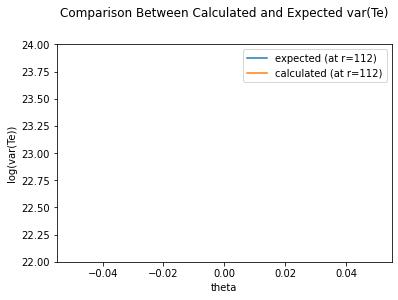

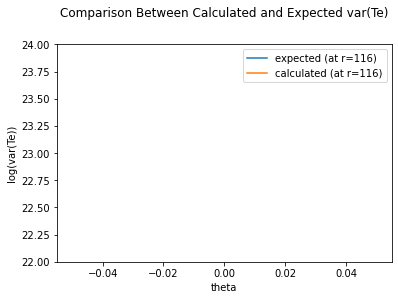

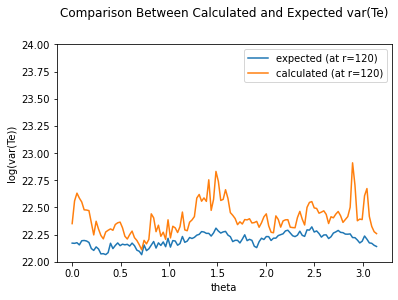

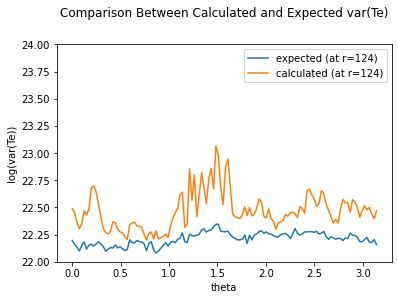

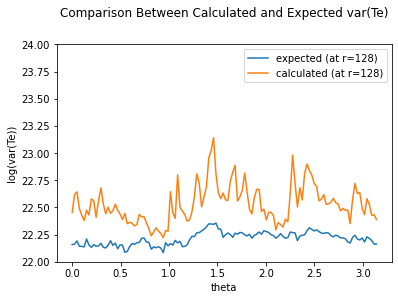

In [14]:
for r in range(0, 129, 4):
    comparison_plot(r, varTe_file, varTe_coeff)

If line up the plots, fix y-axis to be [20.5, 23.85]

As r increases: <br>
underestimation at peaks (until r=18) -> overestimation at peaks and other parts (until r=35) -> overestimation at peaks (two sides of theta) and underestimation at peaks (middle theta) (until r=72)-> overestimation at small to middle theta range and underestimation at large theta range (until r=100)-> overestimations (outermost part) <br>

At different $\phi$: <br>
$\phi = 0$ (follows the test of $\Delta t$=200M): more overestimations along funnel walls and even inside the funnel in both models <br>
MAD <br>
$\phi = 6/8/24$: overestimations at peaks -> underestimations at peaks -> overestimations at peaks, sometimes at outermost region there's a complete shift off the expected curve; for inner to intermediate radius, there's a small offset instead of an apparent shift between the expected and calculated curves <br>

In [24]:
varTe_coeff_fewer = varPg_term + varRHO_term + cov_term1

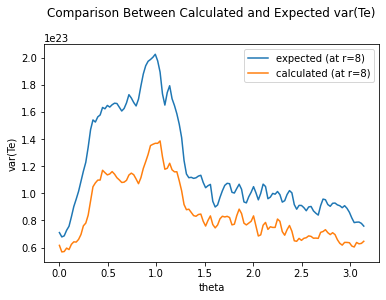

In [25]:
comparison_plot(8, varTe_file, varTe_coeff_fewer)

Tried quite a few different radius, and it's still the Pg and rho terms that are dominant in determining var(Te)

In [40]:
relative_err1 = (varTe_coeff - varTe_file)/varTe_file
relative_err2 = (varTe_coeff_fewer - varTe_file)/varTe_file
err1_mean = np.mean(relative_err1, axis=2)
err2_mean = np.mean(relative_err2, axis=2)

In [41]:
err1_std = np.std(relative_err1, axis=2)
err2_std = np.std(relative_err2, axis=2)

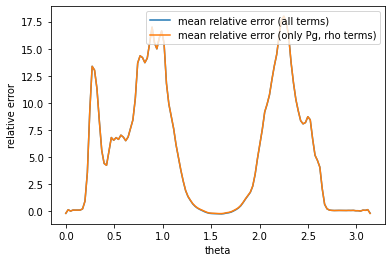

In [44]:
r = 6
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, err1_mean[r, :], label='mean relative error (all terms)')
plt.plot(theta, err2_mean[r, :], label='mean relative error (only Pg, rho terms)')
# plt.plot(theta, err1_std[r, :], label='std of relative error (all terms)')
# plt.plot(theta, err2_std[r, :], label='std of relative error (only Pg, rho terms)')

plt.xlabel('theta')
plt.ylabel('relative error')
plt.legend()
plt.show()

**Decompose var(Te) and compare the curves to the dt=200M ones**

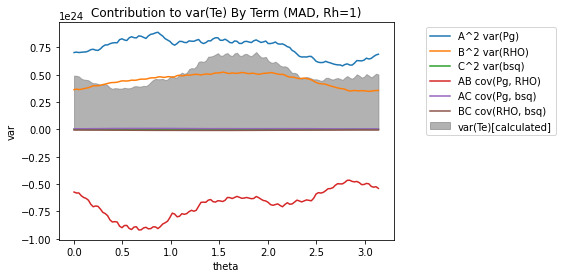

In [24]:
r = 24
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_term[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_term[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_term[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.title('Contribution to var(Te) By Term (MAD, Rh=1)')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

Comparing each term of calculated var(Te)...

|radius|dt=200M|dt=1500M|
|-|-|-|
|r=6|var(RHO) about 1/2 of var(Pg)|larger var(RHO) and larger, more negative cov(Pg, RHO)|
|r=8|var(RHO) about 1/3 of var(Pg)|var(RHO) gets close to var(Pg) and larger, more negative cov(Pg, RHO)|
|r=16|small var(RHO); positive cov(Pg, RHO)|var(RHO) gets close to var(Pg) and large, negative cov(Pg, RHO)|
|r=24|cov(Pg, RHO) is positive and larger than var(RHO); var(RHO) is small|var(RHO) around 2/3 of var(Pg); large, negative cov(Pg, RHO)|
|r=32|very small var(RHO) and cov(Pg, RHO) (positive)|large var(RHO) and large, negative cov(Pg, RHO)|
|r=42|small var(RHO) that gets slightly larger on both ends; small cov(Pg, RHO) (positive on both ends)|var(RHO) about 2/3 of var(Pg), large cov(Pg, RHO)|
|r=56/66/72|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) around 1/2 of var(Pg)|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) around 1/2 of var(Pg)|
|r=84/88/96|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) around 1/3 of var(Pg)|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) around 1/3 of var(Pg)|
|r=102-120|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) getting smaller|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) getting smaller|
|r=126|var(Pg) and cov(Pg, RHO) are close to symmetric, with cov(Pg, RHO) more negative and var(RHO) getting smaller|var(Pg) and cov(Pg, RHO) are close to symmetric, with var(Pg) more positive and var(RHO) getting smaller|

Since it's in the inner radius range that the calculated curve shows significant underestimation for $\Delta t=1500M$ while the curve matches well for $\Delta t=200M$, it's probably the var(RHO) and cov(Pg, RHO) terms that are causing it. To be more specific, it's the increases in (absolute values of) var(RHO) and cov(Pg, RHO) that lead to underestimation at peaks. That makes sense since C[rho->Te] is negative, so it's basically deducting more from the sum.<br>
At around r=24 where the underestimation turns into overestimation in the case of $\Delta t=1500M$ while the curve matches well for $\Delta t=200M$, we notice that the sign of cov(Pg, RHO) is different: with negative cov(Pg, RHO) it shows overestimation.

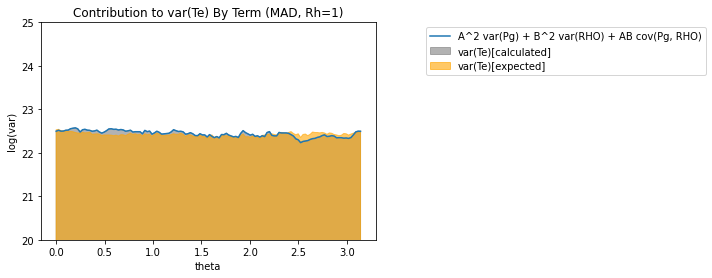

In [27]:
r = 96
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, np.log10(varPg_term[r, 0, :] + varRHO_term[r, 0, :] + cov_term1[r, 0, :]), label='A^2 var(Pg) + B^2 var(RHO) + AB cov(Pg, RHO)')

plt.fill_between(theta, np.log10(varTe_coeff[r, 0, :]), label='var(Te)[calculated]', color='grey', alpha=0.6)
plt.fill_between(theta, np.log10(varTe_file[r, 0, :]), label='var(Te)[expected]', color='orange', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('log(var)')
plt.title('Contribution to var(Te) By Term (MAD, Rh=1)')
plt.ylim(20, 25)
plt.legend(bbox_to_anchor=(2.0, 1.0))
plt.show()

<h5>Rh=160</h5>

In [13]:
# the var(Te) directly calculated from the equation
varTe_rh160 = np.load('ma_rh160_varTe.npy', allow_pickle=True)

In [14]:
# coefficients for MAD Rh=160
ma_CPg160 = np.load('ma_CPg160.npy')
ma_Crho160 = np.load('ma_Crho160.npy')
ma_Cbsq160 = np.load('ma_Cbsq160.npy')

In [15]:
# var(Te) caculated from coefficients and variances
varPg_rh160 = np.square(ma_CPg160)*varPg_file
varRHO_rh160 = np.square(ma_Crho160)*varRHO_file
varbsq_rh160 = np.square(ma_Cbsq160)*varbsq_file
cov_term1_rh160 = 2*ma_CPg160*ma_Crho160*ma_covPgRHO
cov_term2_rh160 = 2*ma_CPg160*ma_Cbsq160*ma_covPgbsq
cov_term3_rh160 = 2*ma_Crho160*ma_Cbsq160*ma_covRHObsq
varTe_coeff_rh160 = varPg_rh160 + varRHO_rh160 + varbsq_rh160 + cov_term1_rh160 + cov_term2_rh160 + cov_term3_rh160

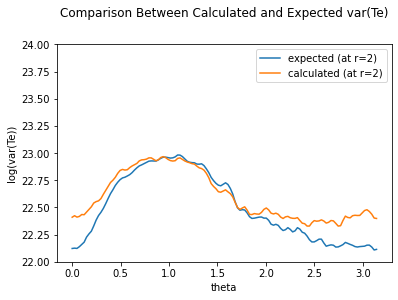

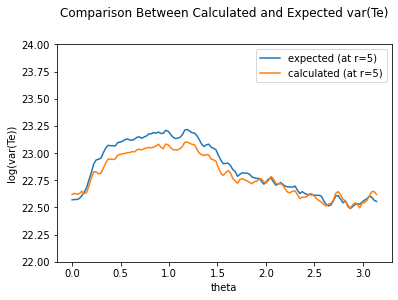

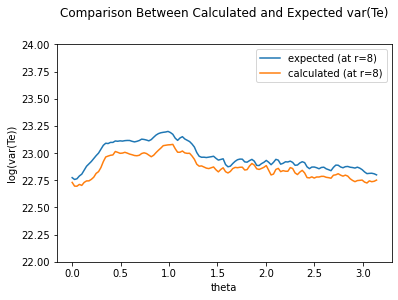

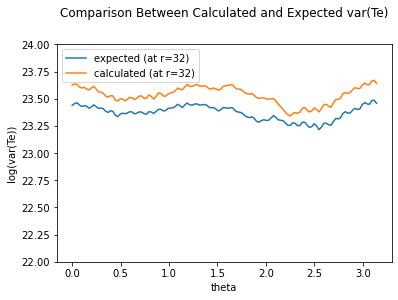

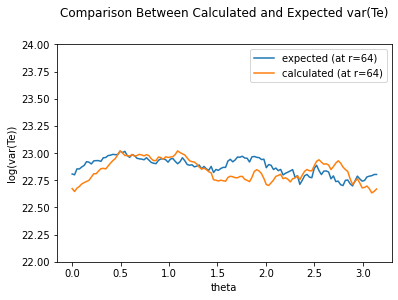

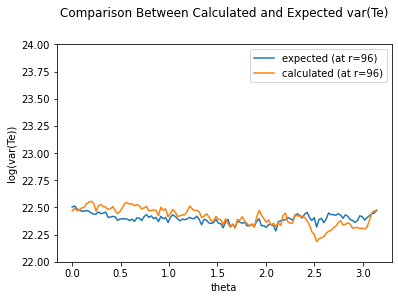

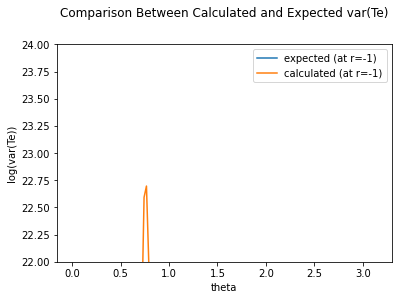

In [18]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_rh160, varTe_coeff_rh160)

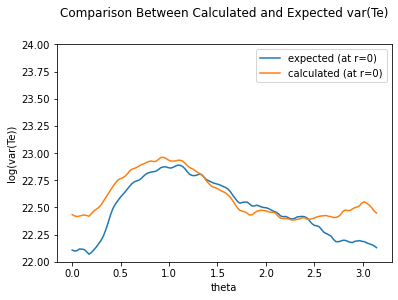

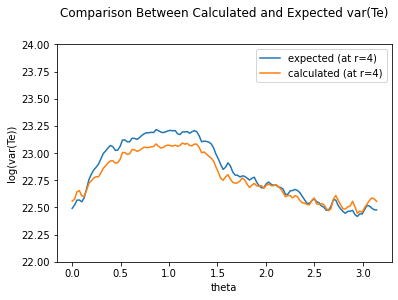

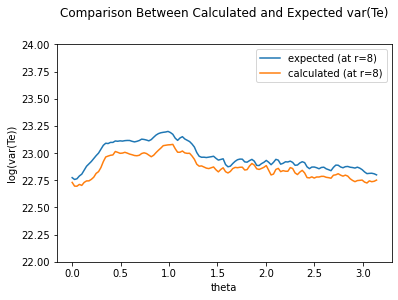

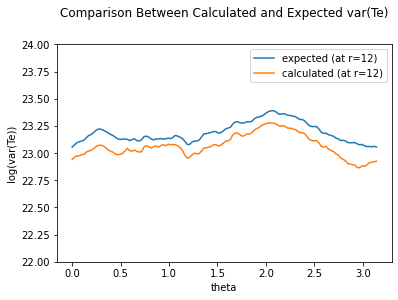

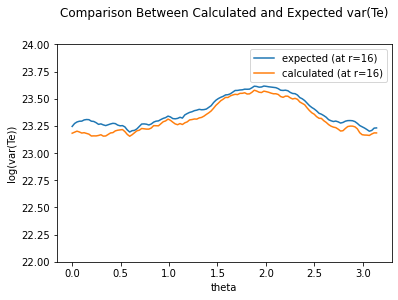

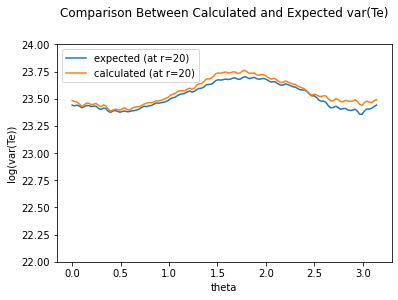

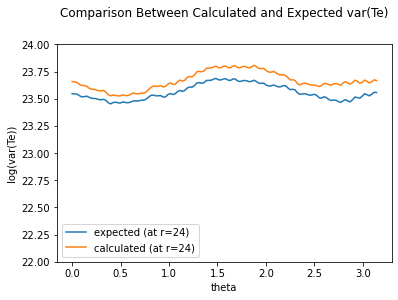

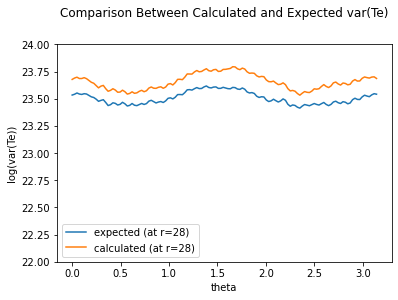

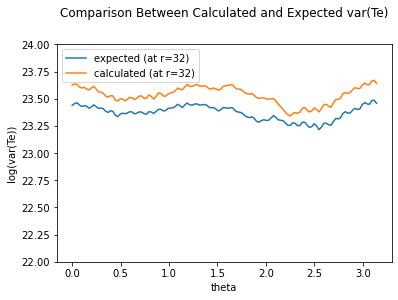

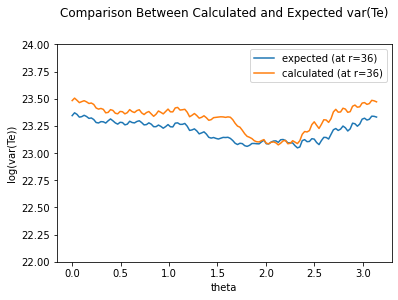

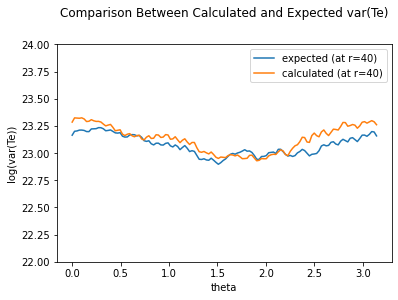

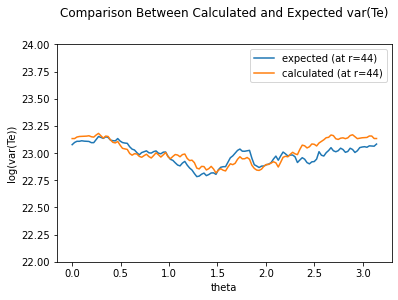

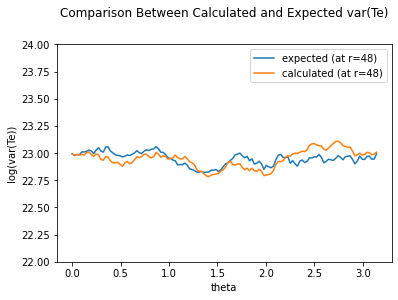

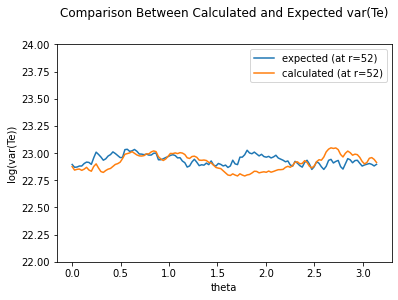

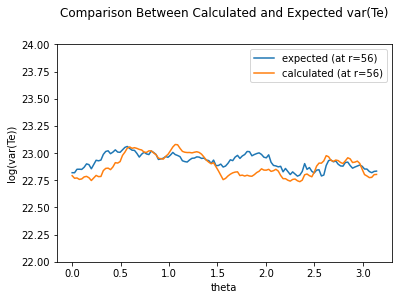

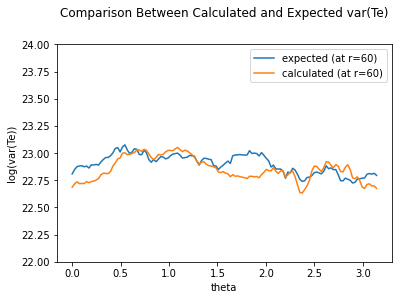

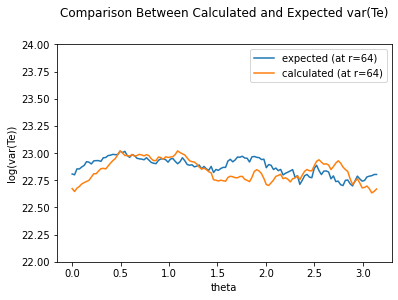

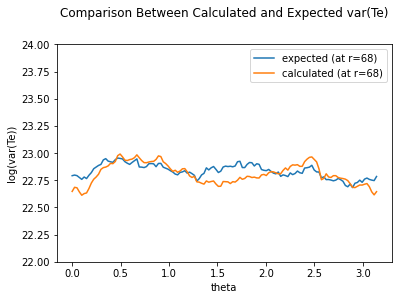

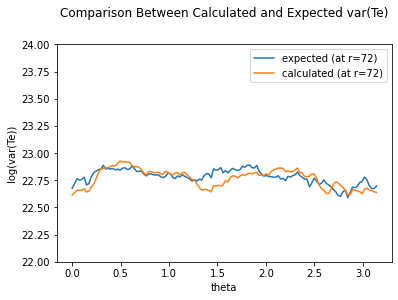

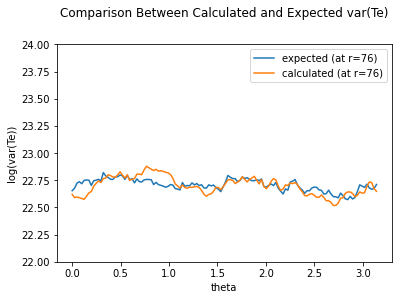

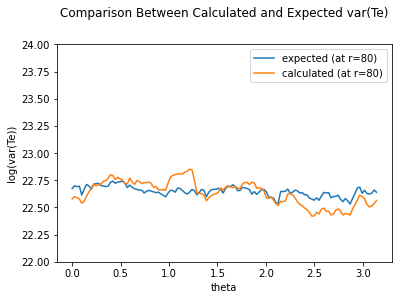

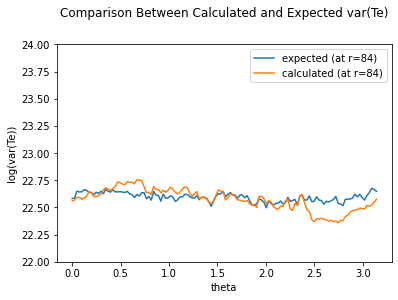

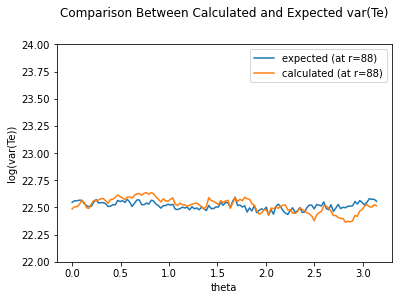

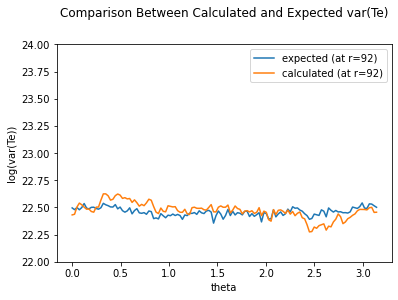

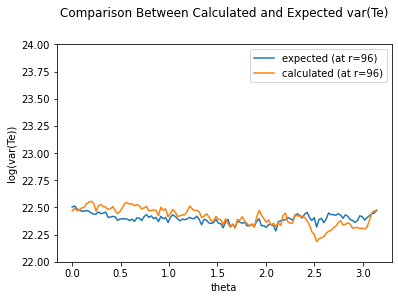

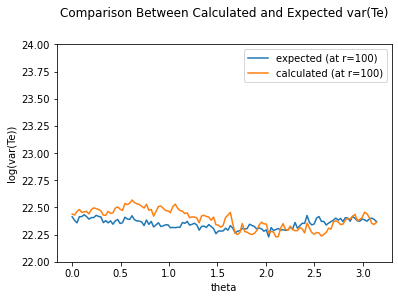

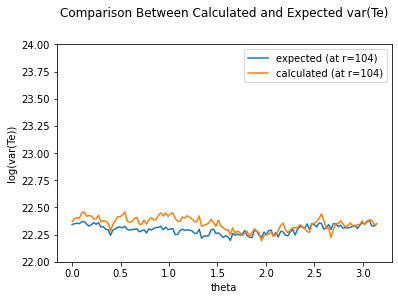

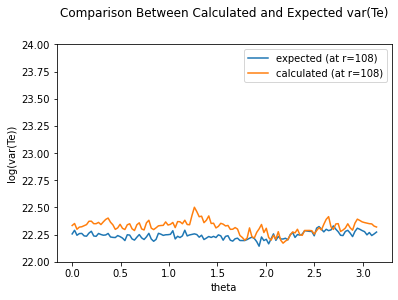

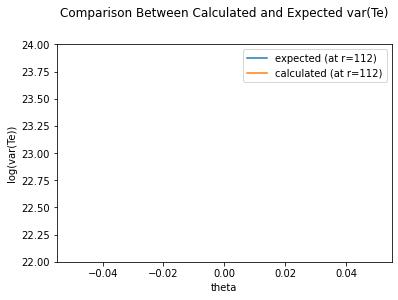

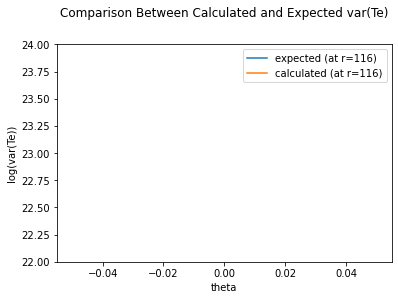

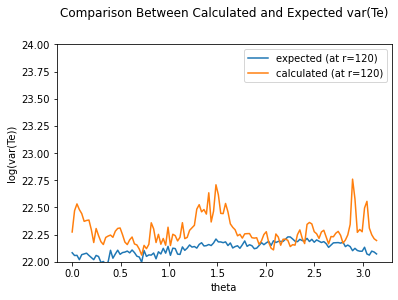

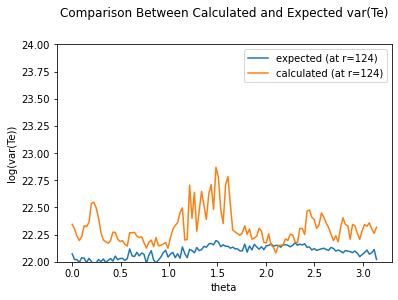

In [19]:
for r in range(0, 128, 4):
    comparison_plot(r, varTe_rh160, varTe_coeff_rh160)

As r increases: <br>
overestimation at the very beginning -> underestimation at peaks (until r=18) -> overestimation at peaks and other parts (until r=35) -> overestimation/underestimation at both ends of theta and underestimation at middle theta (until r=75) -> overestimation at small theta and underestimation at large theta (until r=100) -> overestimations (very high at both ends of theta/middle theta)

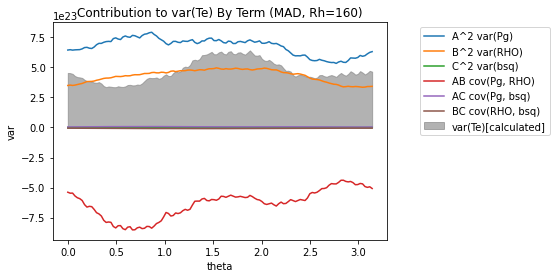

In [22]:
r = 24
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_rh160[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_rh160[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_rh160[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1_rh160[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2_rh160[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3_rh160[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff_rh160[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.title('Contribution to var(Te) By Term (MAD, Rh=160)')
plt.show()

|radius|dt=200M|dt=1500M|
|-|-|-|
|r=0|var(RHO) close to var(Pg), negative cov(Pg, RHO) whose absolute value is slightly larger than that of var(RHO); more fluctuations|var(RHO) larger than var(Pg); large, negative cov(Pg, RHO)|
|r=6/8|var(RHO) about 1/2 of var(Pg); negative cov(Pg, RHO), close to symmetric to var(Pg)|var(RHO) close to var(Pg); large, negative cov(Pg, RHO)|
|r=16|very small var(RHO); positive cov(Pg, RHO)|var(RHO) close to var(Pg); large, negative cov(Pg, RHO)|
|r=24|very small var(RHO); positive cov(Pg, RHO)|var(RHO) around 2/3 of var(Pg); negative cov(Pg, RHO), close to symmetric to var(Pg)|


<h3>SANE</h3>

<h5>Rh=1</h5>

In [7]:
def comparison_plot(r, varTe_exp, varTe_calc):
    # can change phi
    varTe_true = varTe_exp[r, 0, :]
    varTe_coeff = varTe_calc[r, 0, :]

    # x axis: theta
    theta = np.linspace(0, np.pi, 128)

    plt.plot(theta, np.log10(varTe_true), label='expected (at r=%r)'%r)
    plt.plot(theta, np.log10(varTe_coeff), label='calculated (at r=%r)'%r)
    plt.xlabel('theta')
    plt.ylabel('log(var(Te))')
    plt.ylim(19.0, 23.0)
    plt.legend()
    plt.title('Comparison Between Calculated and Expected var(Te)', y=1.1)
    plt.show()

In [8]:
# the var(Te) directly calculated from the equation
varTe_sa_file = np.load('sa_rh1_varTe.npy', allow_pickle=True)
avgTe_sa = np.load('sa_rh1_avgTe.npy', allow_pickle=True)

In [9]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('sa_varPg.npy', allow_pickle=True)
varRHO_file = np.load('sa_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('sa_varbsq.npy', allow_pickle=True)

# averages
sa_avg_Pg = np.load('sa_avgPg.npy', allow_pickle=True)
sa_avg_RHO = np.load('sa_avgRHO.npy', allow_pickle=True)
sa_avg_bsq = np.load('sa_avgbsq.npy', allow_pickle=True)

sa_avgPgRHO = np.load('sa_avgRHOPg.npy', allow_pickle=True)
sa_avgPgbsq = 2*mu*np.load('sa_avgBsqPg.npy', allow_pickle=True)
sa_avgRHObsq = 2*mu*np.load('sa_avgBsqRHO.npy', allow_pickle=True)

# covariances
sa_covPgRHO = sa_avgPgRHO - sa_avg_Pg * sa_avg_RHO
sa_covPgbsq = sa_avgPgbsq - sa_avg_Pg * sa_avg_bsq
sa_covRHObsq = sa_avgRHObsq - sa_avg_RHO * sa_avg_bsq

In [10]:
# coefficients
sa_CPg1 = np.load('sa_CPg1.npy')
sa_Crho1 = np.load('sa_Crho1.npy')
sa_Cbsq1 = np.load('sa_Cbsq1.npy')

In [11]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff = np.square(sa_CPg1)*varPg_file + np.square(sa_Crho1)*varRHO_file + np.square(sa_Cbsq1)*varbsq_file + \
            2*sa_CPg1*sa_Crho1*sa_covPgRHO + 2*sa_CPg1*sa_Cbsq1*sa_covPgbsq + 2*sa_Crho1*sa_Cbsq1*sa_covRHObsq

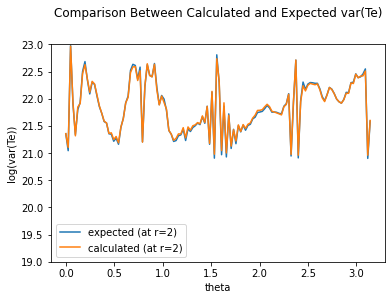

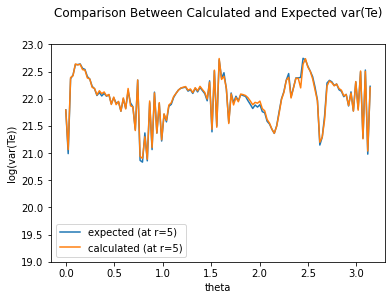

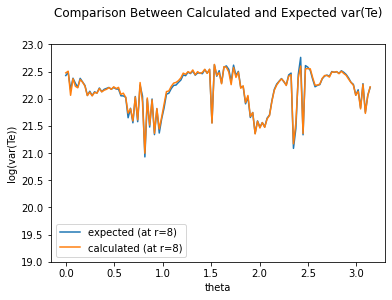

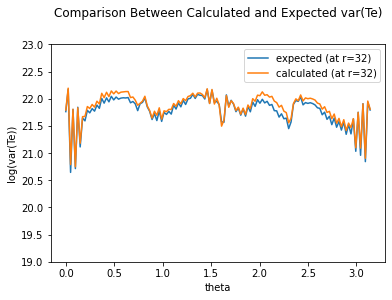

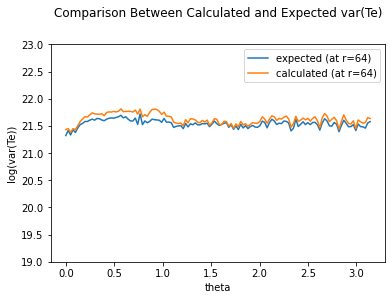

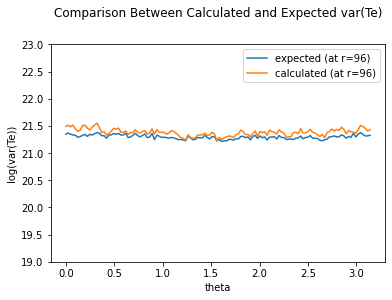

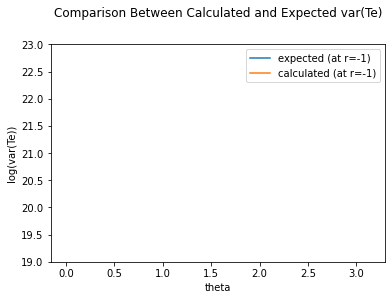

In [12]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_file, varTe_sa_coeff)

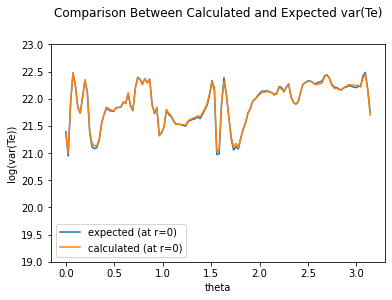

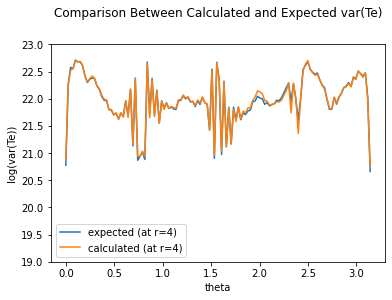

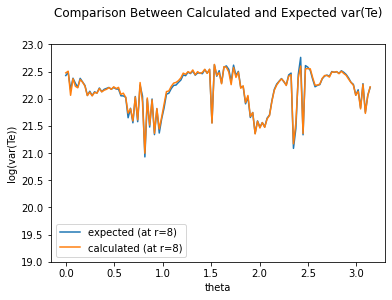

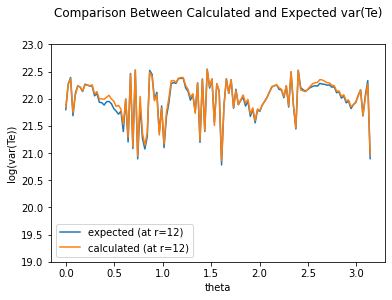

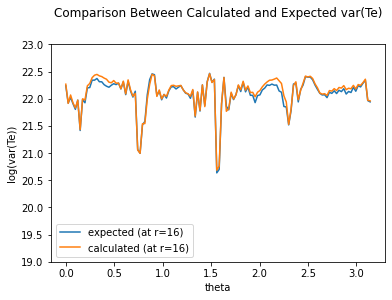

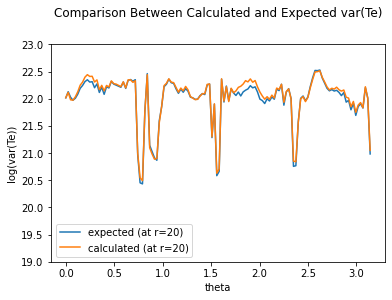

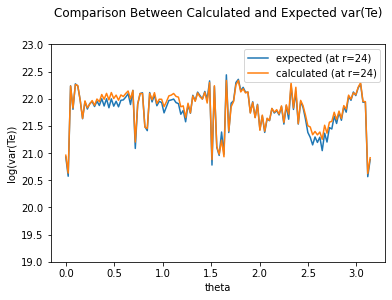

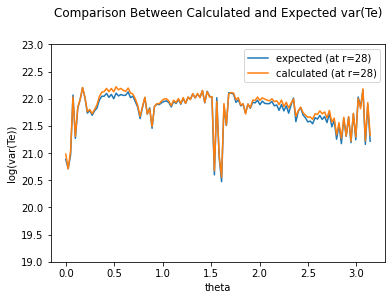

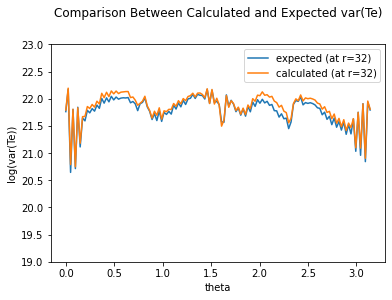

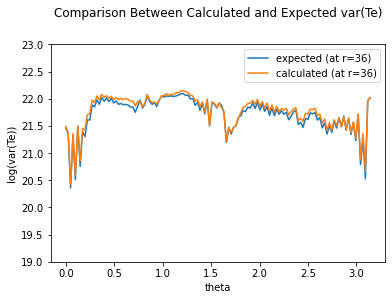

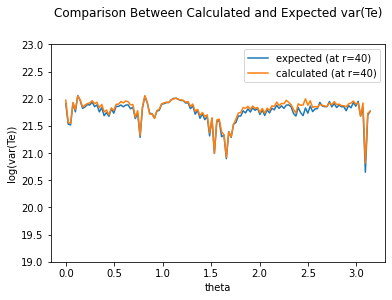

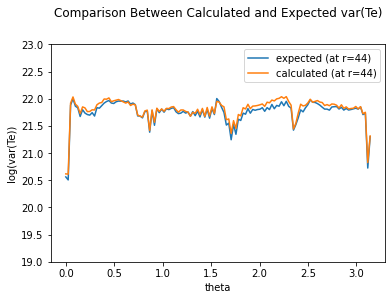

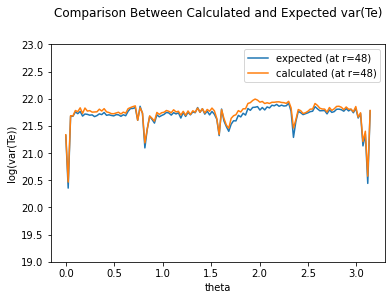

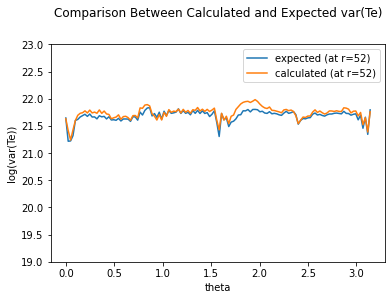

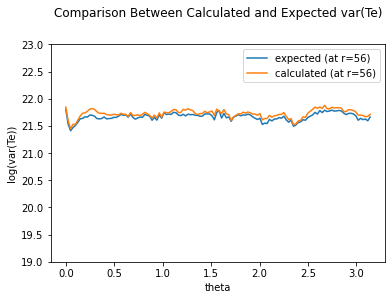

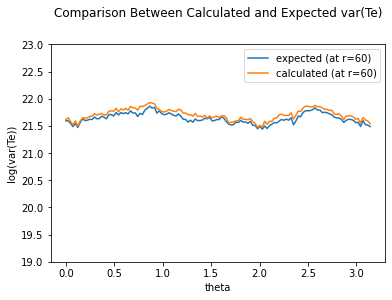

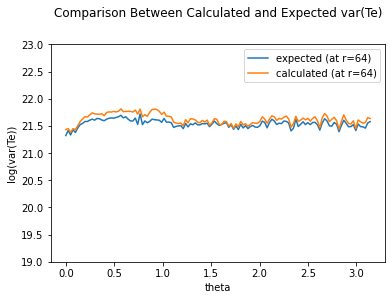

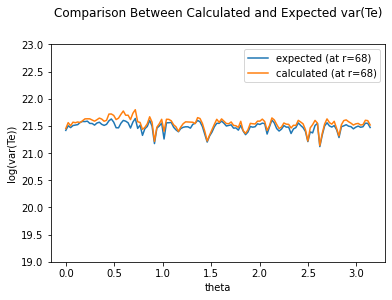

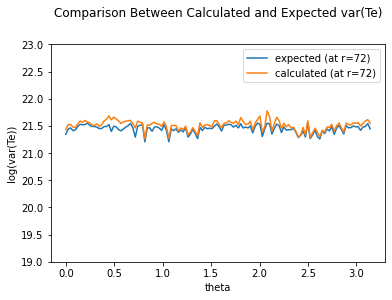

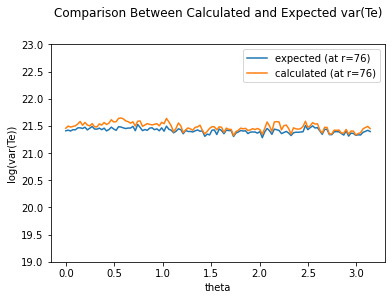

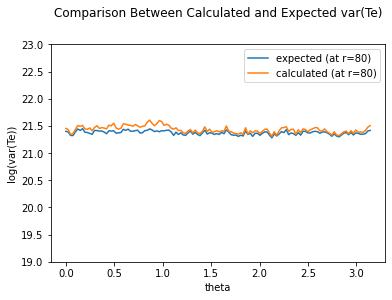

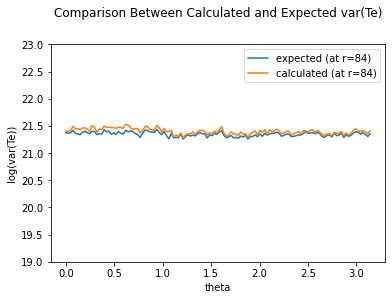

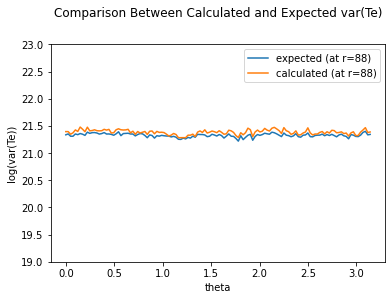

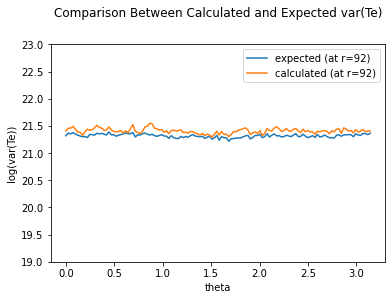

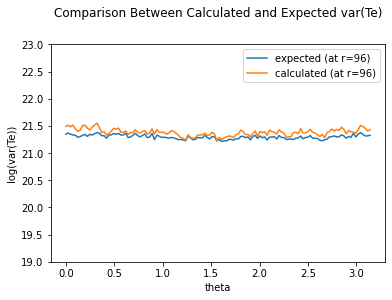

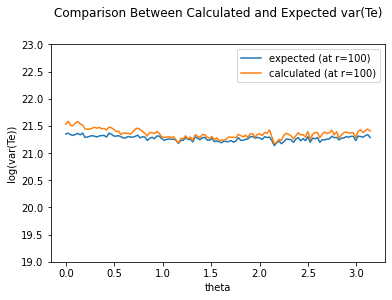

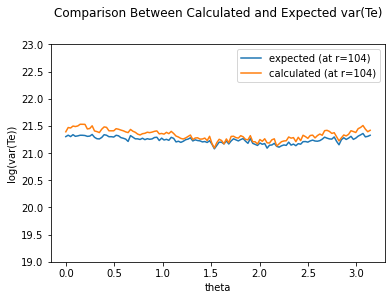

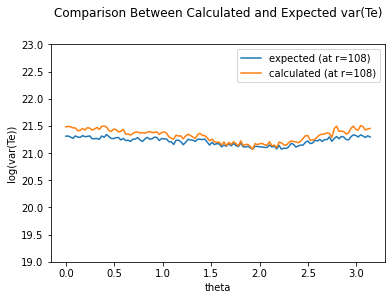

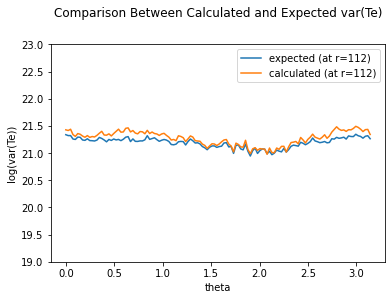

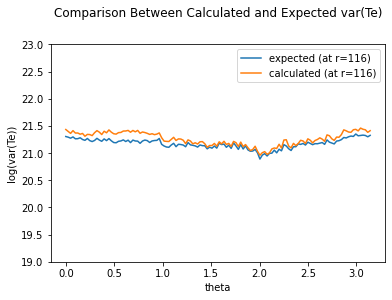

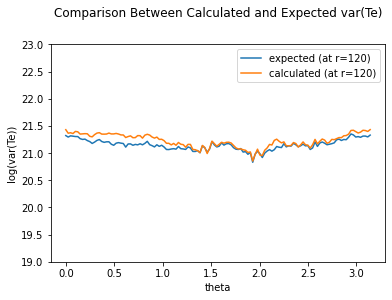

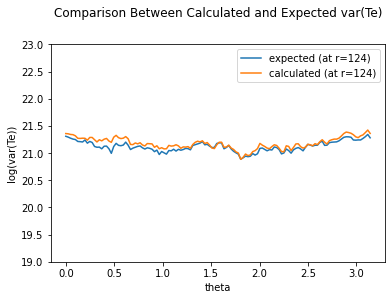

In [13]:
for r in range(0, 128, 4):
    comparison_plot(r, varTe_sa_file, varTe_sa_coeff)

<h5>Rh=160</h5>

In [14]:
# the var(Te) directly calculated
varTe_sa_rh160 = np.load('sa_rh160_varTe.npy', allow_pickle=True)

In [15]:
# coefficients
sa_CPg160 = np.load('sa_CPg160.npy')
sa_Crho160 = np.load('sa_Crho160.npy')
sa_Cbsq160 = np.load('sa_Cbsq160.npy')

In [16]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff160 = np.square(sa_CPg160)*varPg_file + np.square(sa_Crho160)*varRHO_file + np.square(sa_Cbsq160)*varbsq_file + \
            2*sa_CPg160*sa_Crho160*sa_covPgRHO + 2*sa_CPg160*sa_Cbsq160*sa_covPgbsq + 2*sa_Crho160*sa_Cbsq160*sa_covRHObsq

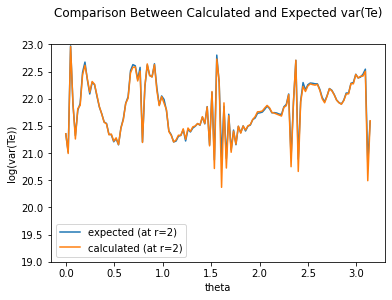

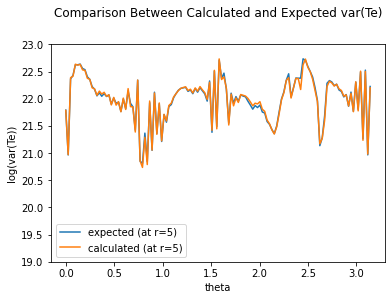

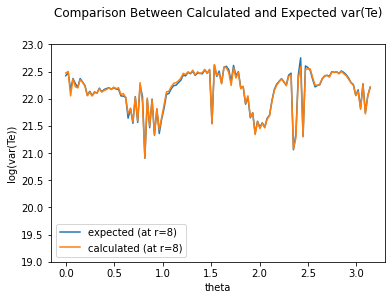

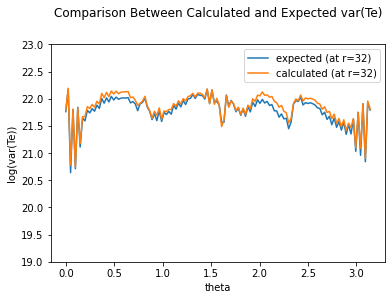

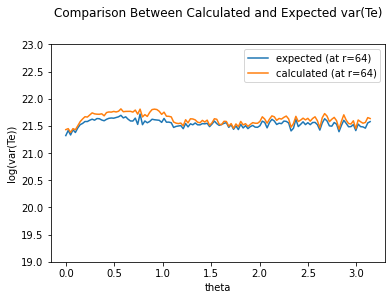

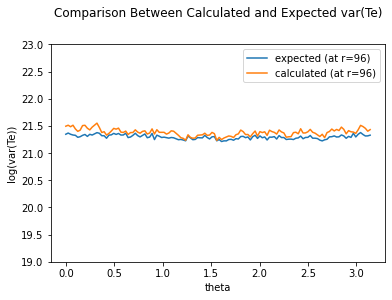

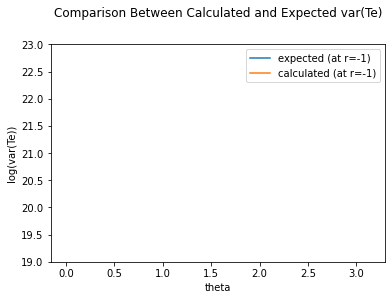

In [17]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_rh160, varTe_sa_coeff160)

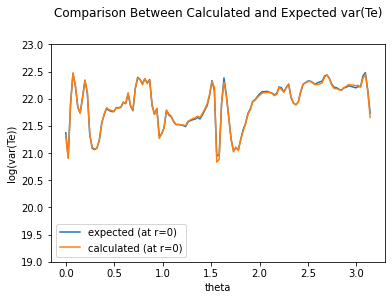

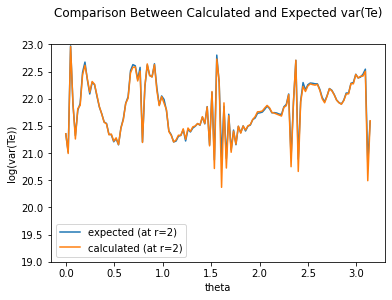

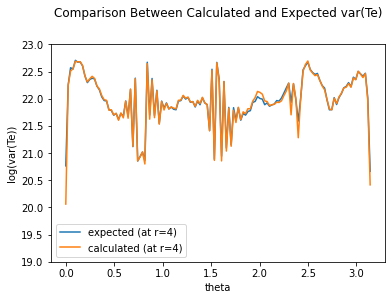

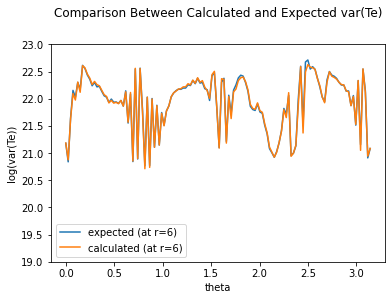

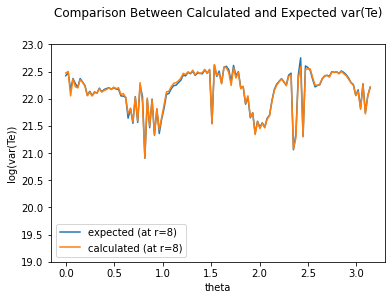

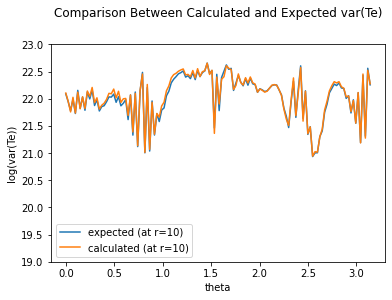

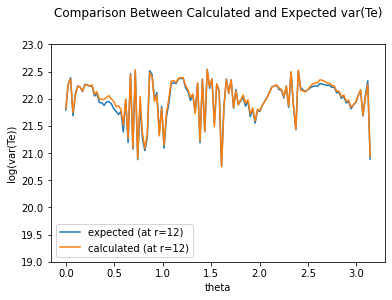

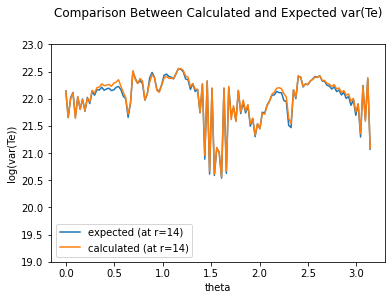

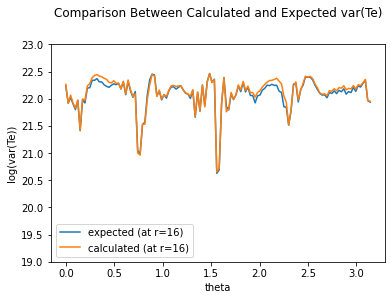

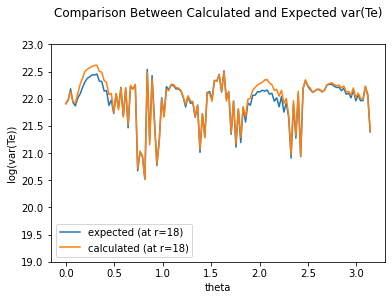

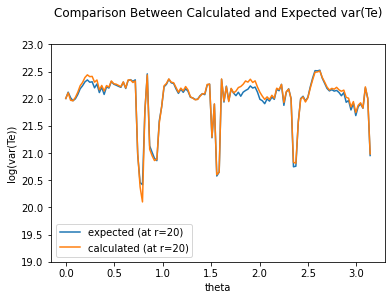

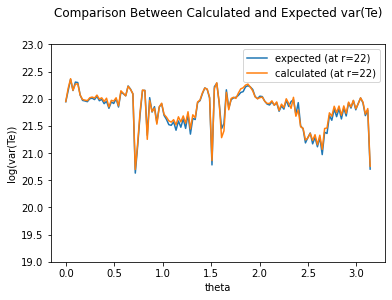

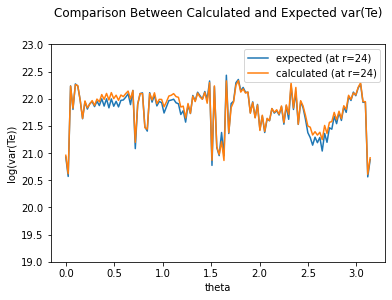

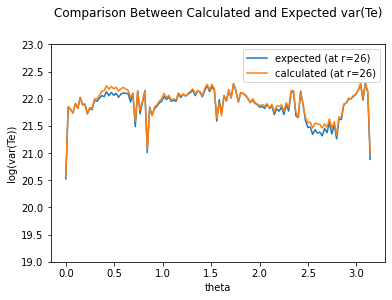

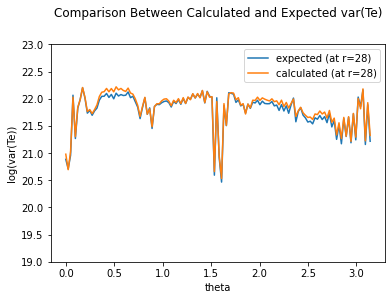

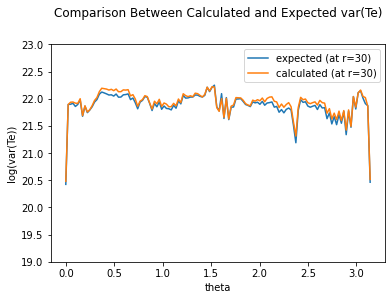

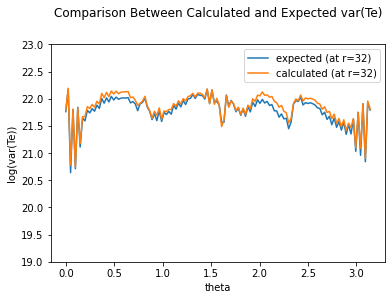

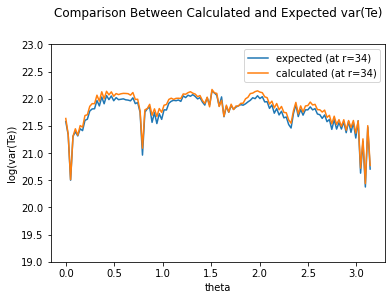

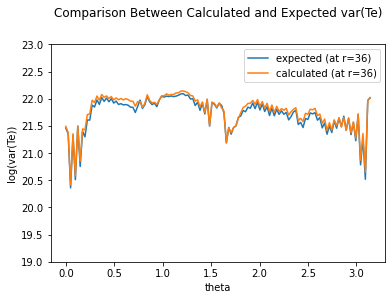

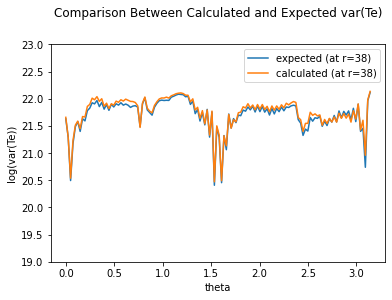

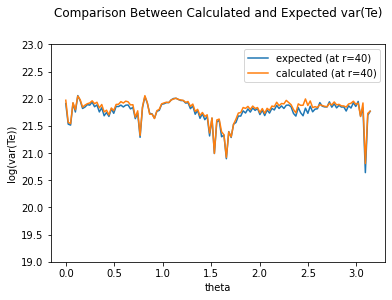

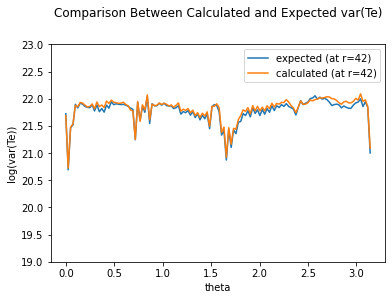

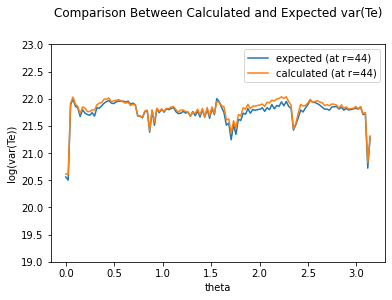

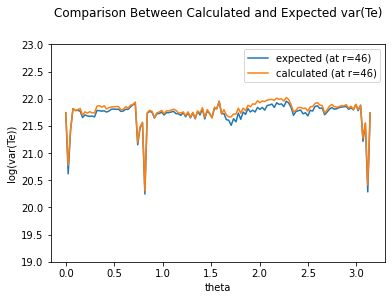

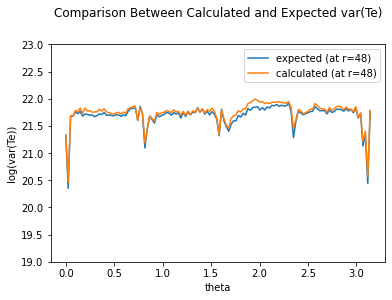

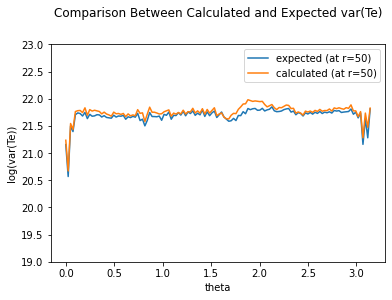

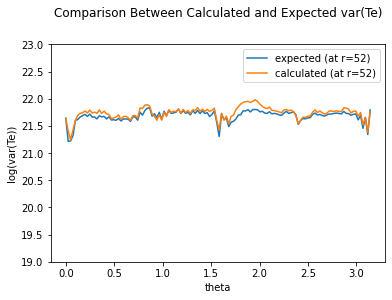

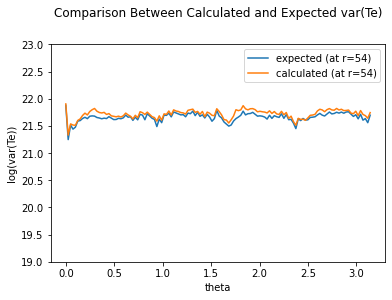

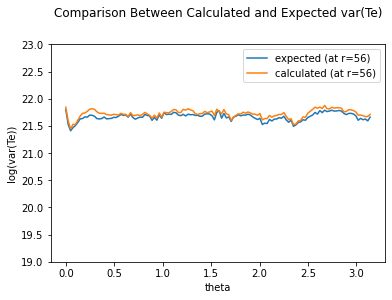

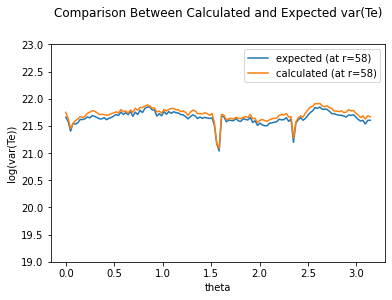

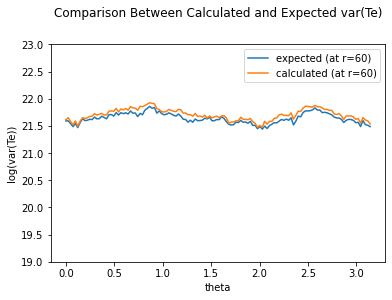

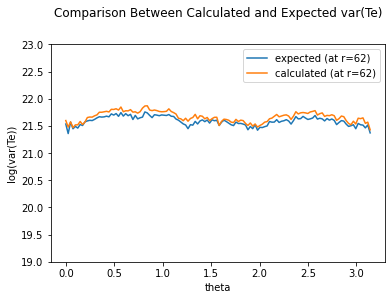

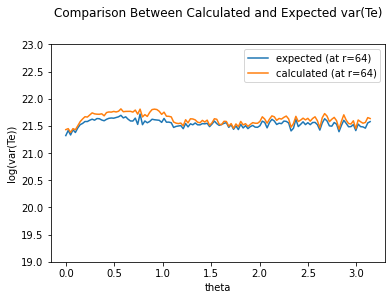

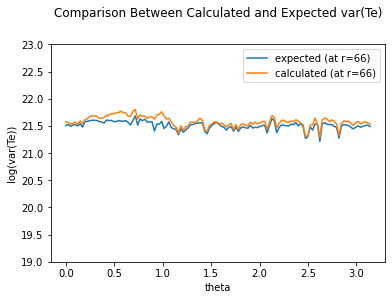

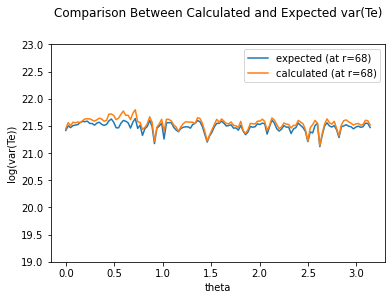

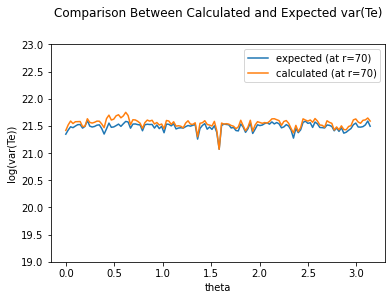

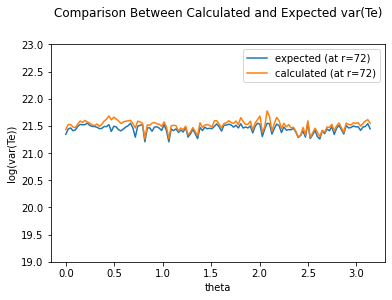

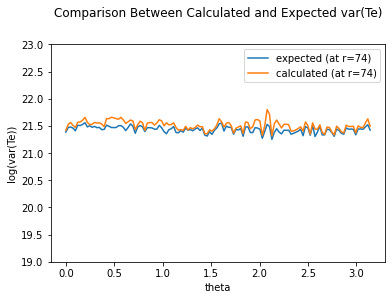

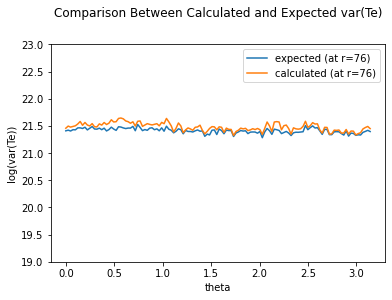

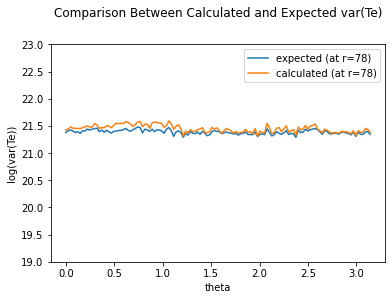

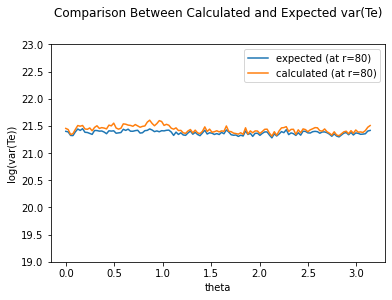

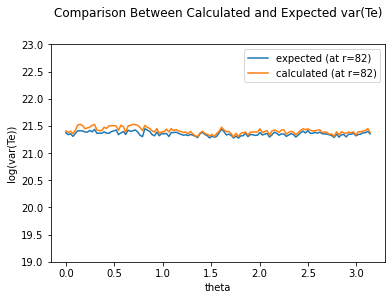

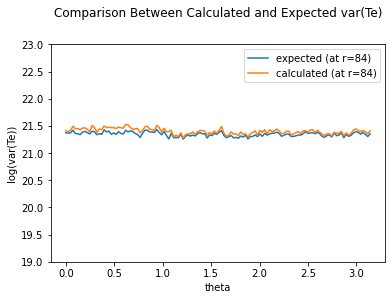

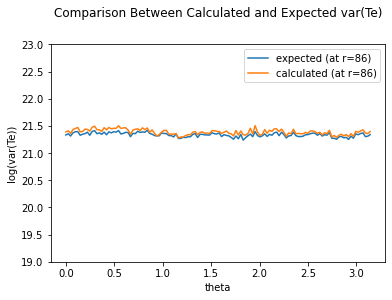

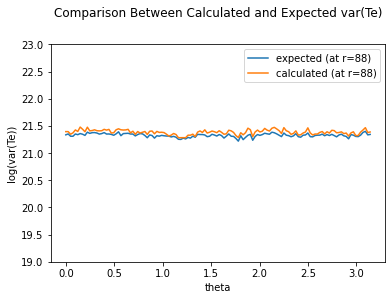

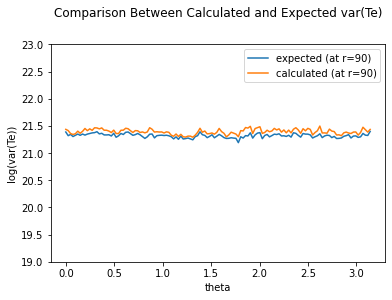

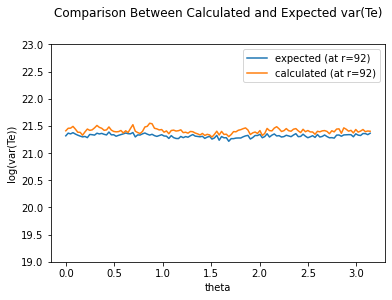

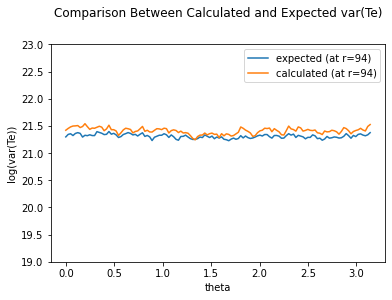

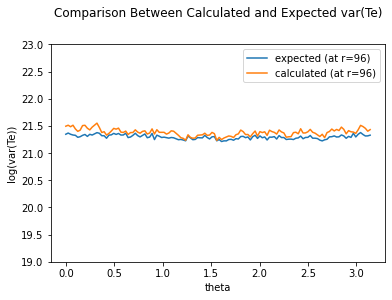

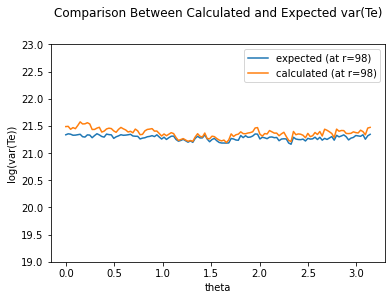

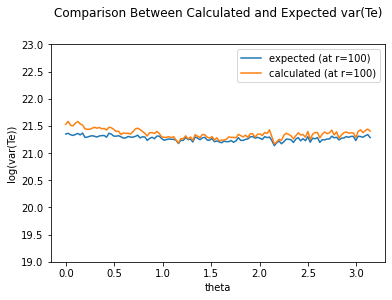

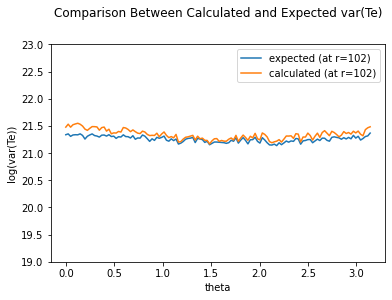

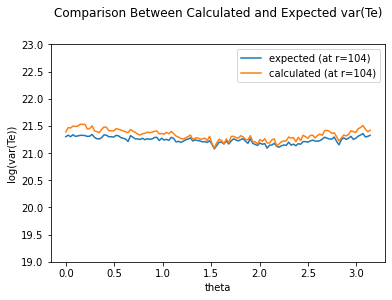

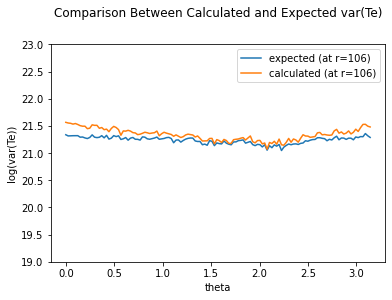

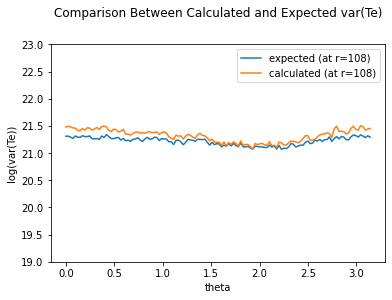

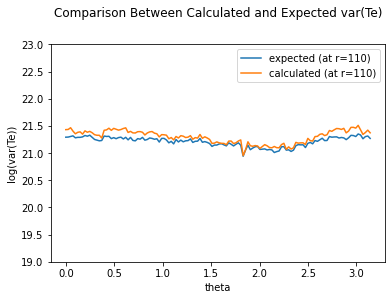

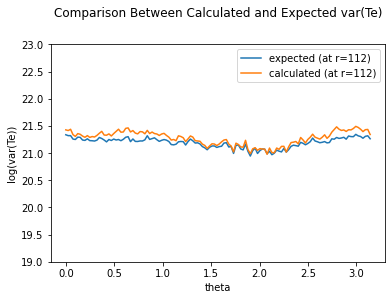

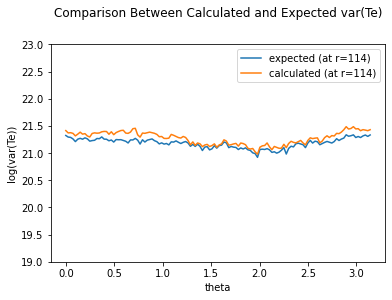

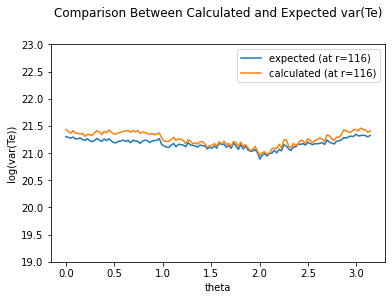

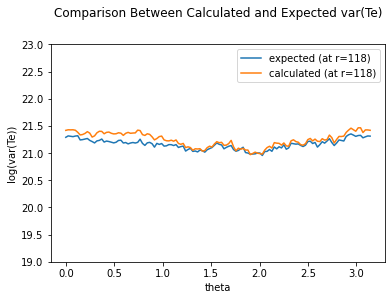

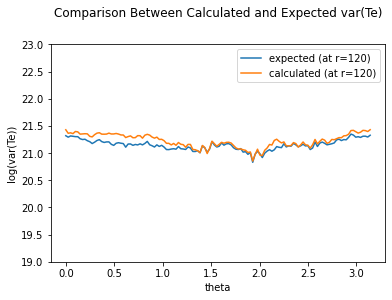

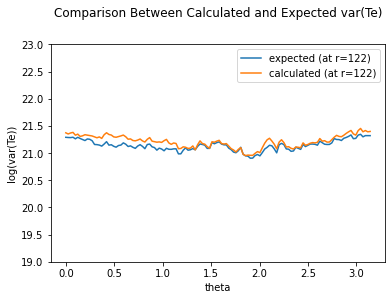

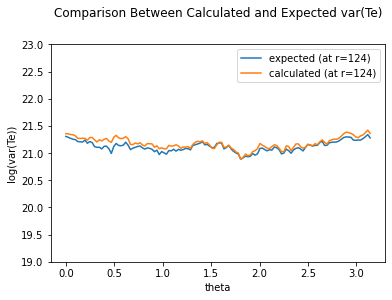

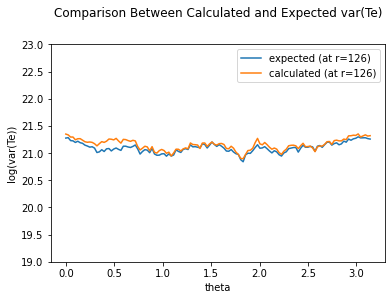

In [18]:
for r in range(0, 128, 2):
    comparison_plot(r, varTe_sa_rh160, varTe_sa_coeff160)

Overall, apparent offset near peaks/poles or $\theta$ ranges with centers at $\frac{1}{3}\pi$ or $\frac{2}{3}\pi$

<h5>MAD model: along xz</h5>

In [16]:
dump_ma = pyharm.load_dump(fname(i0, src_ma_5M))

In [17]:
# for Rh=1
dump_ma.cache['varTe_exp'] = np.load('ma_rh1_varTe.npy', allow_pickle=True)
dump_ma.cache['varTe_cal'] = varTe_coeff

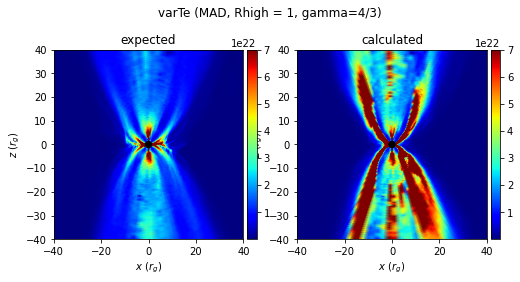

In [18]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_ma, 'varTe_exp', window=w, vmin=10**14, vmax=7.*10**22, label='expected')
pplt.plot_xz(axes[1], dump_ma, 'varTe_cal', window=w, vmin=10**14, vmax=7.*10**22, label='calculated')
plt.suptitle('varTe (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

In [19]:
dump_ma_copy = pyharm.load_dump(fname(i0, src_ma_5M))

In [20]:
# for Rh=160
dump_ma_copy.cache['varTe_exp'] = np.load('ma_rh160_varTe.npy', allow_pickle=True)
dump_ma_copy.cache['varTe_cal'] = varTe_coeff_rh160

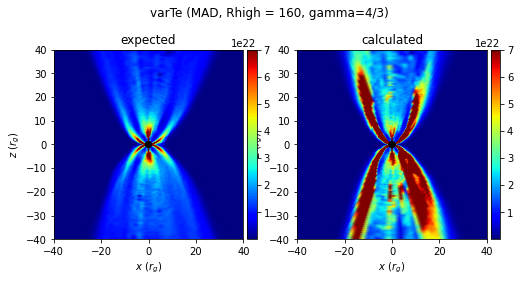

In [21]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_ma_copy, 'varTe_exp', window=w, vmin=10**14, vmax=7.*10**22, label='expected')
pplt.plot_xz(axes[1], dump_ma_copy, 'varTe_cal', window=w, vmin=10**14, vmax=7.*10**22, label='calculated')
plt.suptitle('varTe (MAD, Rhigh = 160, gamma=4/3)')
plt.show()

For MAD, the coefficient estimation tends to overestimate the variations in the parts of funnel wall and the funnel itself that are farther away from the center black hole.

<h5>SANE: along xz</h5>

In [19]:
dump_sa = pyharm.load_dump(fname(i0, src_sa_5M))

In [20]:
# for Rh=1
dump_sa.cache['varTe_exp'] = np.load('sa_rh1_varTe.npy', allow_pickle=True)
dump_sa.cache['varTe_cal'] = varTe_sa_coeff

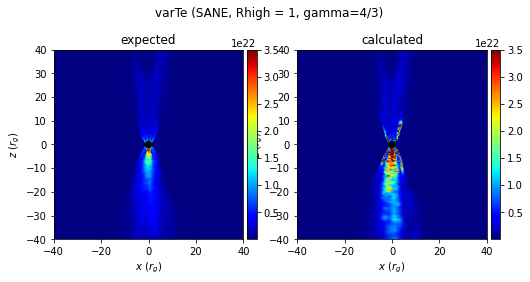

In [21]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_sa, 'varTe_exp', window=w, vmin=10**19, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_sa, 'varTe_cal', window=w, vmin=10**19, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (SANE, Rhigh = 1, gamma=4/3)')
plt.show()

In [23]:
dump_sa_copy = pyharm.load_dump(fname(i0, src_sa_5M))

In [24]:
# for Rh=160
dump_sa_copy.cache['varTe_exp'] = np.load('sa_rh160_varTe.npy', allow_pickle=True)
dump_sa_copy.cache['varTe_cal'] = varTe_sa_coeff160

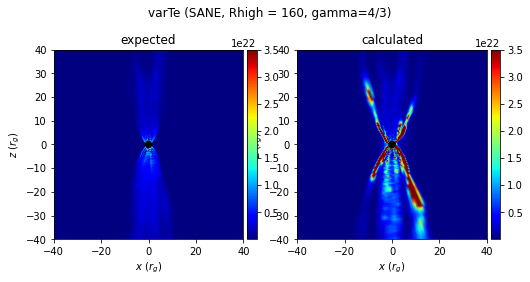

In [25]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_sa_copy, 'varTe_exp', window=w, vmin=10**19, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_sa_copy, 'varTe_cal', window=w, vmin=10**19, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (SANE, Rhigh = 160, gamma=4/3)')
plt.show()

For SANE, the coefficient estimation also tends to overestimate the variations in the parts of funnel wall and the funnel itself that are farther away from the center black hole.